# 01 - GPCR Data Exploration

**Goal**: Parse FASTA file and explore the alignment

## Steps
1. Parse FASTA file
2. Basic statistics
3. Visualize sequence lengths
4. Analyze gap distribution
5. Look at sample sequences

In [ ]:
import sys
sys.path.append('..')  # Add parent directory to path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Import our parser
from src.data.parser import GPCRFastaParser

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('✅ Imports successful!')

Matplotlib is building the font cache; this may take a moment.


✅ Imports successful!


## Step 1: Parse FASTA File

In [5]:
# Path to your FASTA file
FASTA_FILE = '../data/raw/beta1.fasta'

# Initialize parser
parser = GPCRFastaParser(FASTA_FILE)

# Parse sequences
df = parser.parse()

print(f'\n📊 Dataset shape: {df.shape}')
print(f'   Columns: {list(df.columns)}')

Parsing ..\data\raw\beta1.fasta...
✅ Parsed 2000 sequences
   Average length: 431 aa
   Average gaps: 19.5%

📊 Dataset shape: (2000, 7)
   Columns: ['id', 'uniref_id', 'full_header', 'sequence', 'length', 'gap_count', 'gap_percentage']


In [6]:
# Display first few sequences
df.head()

,id,uniref_id,full_header,sequence,length,gap_count,gap_percentage
0,P07550,P07550,P07550,MGQPGNGSAFLLAPNGSHAPDHDVTQERDEVWVVGMGIVMSLIVLA...,413,0,0.0
1,UniRef100_A0A8D2HM49,A0A8D2HM49,UniRef100_A0A8D2HM49\t434\t0.920\t2.021E-131\t...,MGQPGNSSDFLLASNGSHAPDHNVTQERDEAWVVGMAIVMSLIVLA...,416,0,0.0
2,UniRef100_A0A250YHJ2,A0A250YHJ2,UniRef100_A0A250YHJ2\t430\t0.889\t4.668E-130\t...,MGQPGNDSDFLLAPNGSQAPGHDITQERDEAWVVGMAMVMSLIVLA...,418,0,0.0
3,UniRef100_UPI0000E2F3F2,UPI0000E2F3F2,UniRef100_UPI0000E2F3F2\t427\t0.902\t5.752E-12...,MGQPGNGSDFLLAPNGSHAPDHDISQETDEAWVVGLAIVMSLIVLA...,420,0,0.0
4,UniRef100_UPI00189D415B,UPI00189D415B,UniRef100_UPI00189D415B\t426\t0.894\t7.873E-12...,MGQPGNNSVFLLAPNGSHEPDHNVTQERDEAWVVGMGIVMSFIVLA...,418,0,0.0


## Step 2: Basic Statistics

In [7]:
# Get statistics
stats = parser.get_statistics(df)

print('📈 Dataset Statistics:')
print('='*50)
for key, value in stats.items():
    if isinstance(value, float):
        print(f'{key:.<30} {value:.2f}')
    else:
        print(f'{key:.<30} {value}')

📈 Dataset Statistics:
total_sequences............... 2000
avg_length.................... 431.02
min_length.................... 0
max_length.................... 555
avg_gap_percentage............ 19.46
sequences_with_gaps........... 1972


In [8]:
# Detailed statistics
print('\n📊 Sequence Length Distribution:')
print(df['length'].describe())


📊 Sequence Length Distribution:
count    2000.000000
mean      431.016500
std        22.483638
min         0.000000
25%       416.000000
50%       424.000000
75%       439.000000
max       555.000000
Name: length, dtype: float64


## Step 3: Visualizations

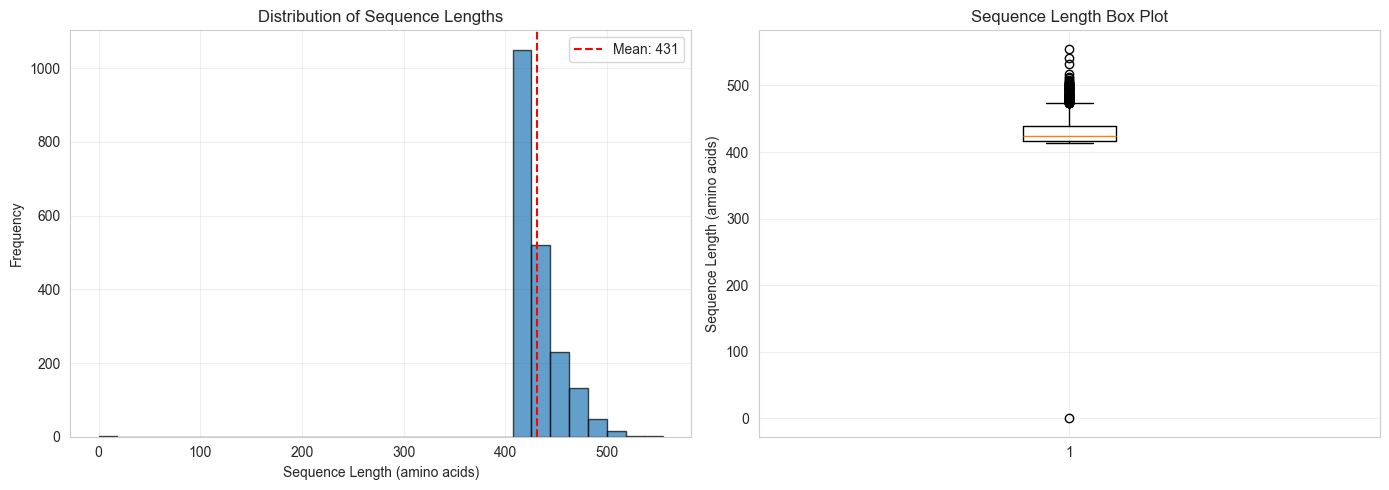

In [10]:
import os
# Sequence length distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['length'], bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(df['length'].mean(), color='red', linestyle='--', label=f'Mean: {df["length"].mean():.0f}')
axes[0].set_xlabel('Sequence Length (amino acids)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sequence Lengths')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['length'], vert=True)
axes[1].set_ylabel('Sequence Length (amino acids)')
axes[1].set_title('Sequence Length Box Plot')
axes[1].grid(alpha=0.3)

plt.tight_layout()
os.makedirs('../results/figures/', exist_ok=True)
plt.savefig('../results/figures/sequence_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

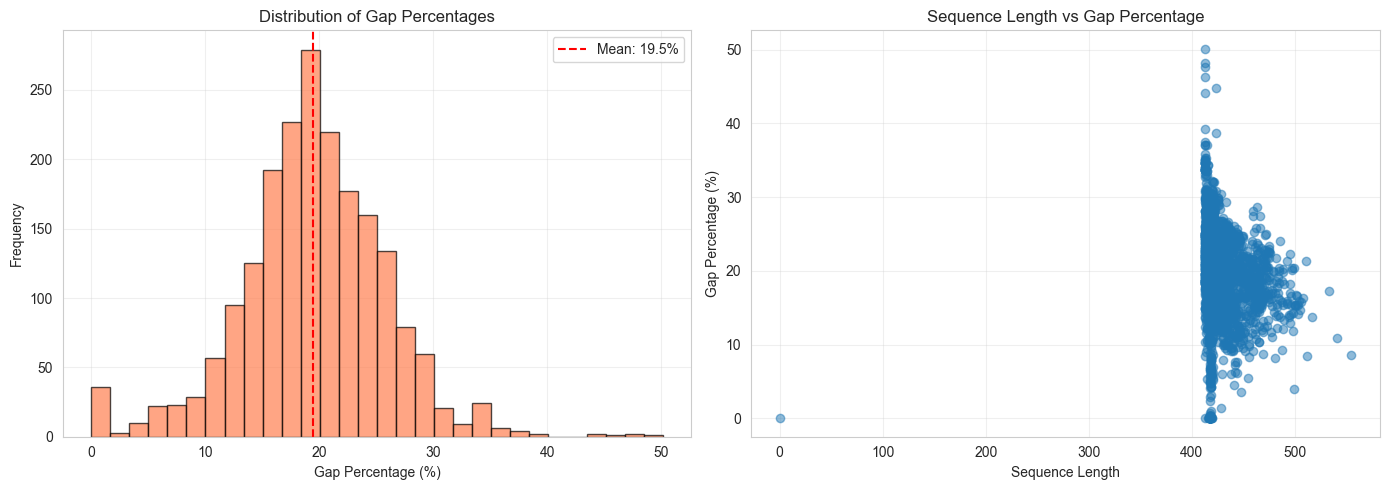

In [17]:
# Gap percentage distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['gap_percentage'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0].axvline(df['gap_percentage'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["gap_percentage"].mean():.1f}%')
axes[0].set_xlabel('Gap Percentage (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Gap Percentages')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Scatter: length vs gap percentage
axes[1].scatter(df['length'], df['gap_percentage'], alpha=0.5)
axes[1].set_xlabel('Sequence Length')
axes[1].set_ylabel('Gap Percentage (%)')
axes[1].set_title('Sequence Length vs Gap Percentage')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/gap_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Step 4: Examine Sample Sequences

In [18]:
# Look at a few sequences
sample_idx = 0

sample = df.iloc[sample_idx]
print(f'Sample Sequence #{sample_idx}:')
print(f'UniRef ID: {sample["uniref_id"]}')
print(f'Length: {sample["length"]} aa')
print(f'Gaps: {sample["gap_count"]} ({sample["gap_percentage"]}%)')
print(f'\nSequence (first 100 residues):')
print(sample['sequence'][:100])

Sample Sequence #0:
UniRef ID: P07550
Length: 413 aa
Gaps: 0 (0.0%)

Sequence (first 100 residues):
MGQPGNGSAFLLAPNGSHAPDHDVTQERDEVWVVGMGIVMSLIVLAIVFGNVLVITAIAKFERLQTVTNYFITSLACADLVMGLAVVPFGAAHILMKMWT


In [19]:
# Check for conserved motifs in a sample
import re

def find_motif(sequence, motif_pattern):
    """Find motif in sequence"""
    matches = []
    for match in re.finditer(motif_pattern, sequence.replace('-', '')):
        matches.append((match.start(), match.group()))
    return matches

# Look for DRY motif
sample_seq = df.iloc[0]['sequence']
dry_matches = find_motif(sample_seq, 'DRY')
npxxy_matches = find_motif(sample_seq, 'NP..Y')

print('🔍 Conserved Motifs in Sample Sequence:')
print(f'   DRY motif: {dry_matches if dry_matches else "Not found"}')
print(f'   NPxxY motif: {npxxy_matches if npxxy_matches else "Not found"}')

🔍 Conserved Motifs in Sample Sequence:
   DRY motif: [(129, 'DRY')]
   NPxxY motif: [(321, 'NPLIY')]


In [20]:
# Count how many sequences have these motifs
df['has_DRY'] = df['sequence'].str.contains('DRY', regex=False)
df['has_NPxxY'] = df['sequence'].str.contains(r'NP[A-Z]{2}Y', regex=True)

print('\n📊 Motif Presence:')
print(f'   Sequences with DRY motif: {df["has_DRY"].sum()} ({df["has_DRY"].sum()/len(df)*100:.1f}%)')
print(f'   Sequences with NPxxY motif: {df["has_NPxxY"].sum()} ({df["has_NPxxY"].sum()/len(df)*100:.1f}%)')


📊 Motif Presence:
   Sequences with DRY motif: 1807 (90.3%)
   Sequences with NPxxY motif: 1952 (97.6%)


## Step 5: Save Processed Data

In [22]:
# Save parsed data
output_path = Path('../data/processed/sequences_parsed.csv')
output_path.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(output_path, index=False)

print(f'💾 Saved {len(df)} sequences to: {output_path}')
print(f'\n✅ Data exploration complete!')

💾 Saved 2000 sequences to: ..\data\processed\sequences_parsed.csv

✅ Data exploration complete!


## Summary

From this exploration, we learned:
- Total number of sequences in the alignment
- Average sequence length and variation
- Presence of alignment gaps
- Presence of conserved motifs (DRY, NPxxY)

**Next**: We need to map these sequences to their GPCR subfamilies using UniProt API